# Figure 6

In [1]:
source(here::here("code/init.R"))

ℹ Parallelization enabled. Using 102 threads.



In [2]:
model_list <- readr::read_rds(here("data/models/gastrulation_models_homogenized.rds"))
model_list_lt <- readr::read_rds(here("data/models/gastrulation_pbm_list.rds"))

In [3]:
traj_colors <- list(
    meso = c("#635547", "#C594BF"),
    endo = c("#635547", "#EF5A9D"),
    cnp = c("#635547", "#354E23"),
    card = c("#C594BF", "#B51D8D"),
    caud = c("#C594BF", "#1a3f52"),
    exe = c("#C594BF", "#8870ad"),
    mep = c("#A52A2A", "red"),
    cmp = c("#A52A2A", "darkgreen"),
    clp = c("#A52A2A", "steelblue2")
)

model_traj_map <- c(
    "meso" = "Epi->Meso",
    "endo" = "Epi->Endo",
    "cnp" = "Epi->Ecto",
    "exe" = "Meso->Exe",
    "caud" = "Meso->Caudal-Meso",
    "card" = "Meso->Cardio-Meso",
    "clp" = "HSC->CLP",
    "mep" = "HSC->MEP",
    "cmp" = "HSC->CMP"
)

In [4]:
traj_model <- model_list[["meso"]]
interval_meso <- traj_model@normalized_energies %>%
    as.data.frame() %>%
    bind_cols(traj_model@peak_intervals %>% select(chrom:end)) %>%
    mutate(score = traj_model@diff_score) %>%
    arrange(desc(score)) %>%
    slice(2) %>%
    select(chrom:end, score)
interval_meso

,chrom,start,end,score
,<fct>,<dbl>,<dbl>,<dbl>
78832,chr7,144803420,144803720,0.9590753


→ Computing energies and responses for 19 PBM models



→ 7 PBM models have at least one position with energy >= 8

→ Preparing ATAC-seq data (2 tracks)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `cumw = cumw/max(cumw)`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf”
→ Preparing annotation data (1 tracks)

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_rect()`).”


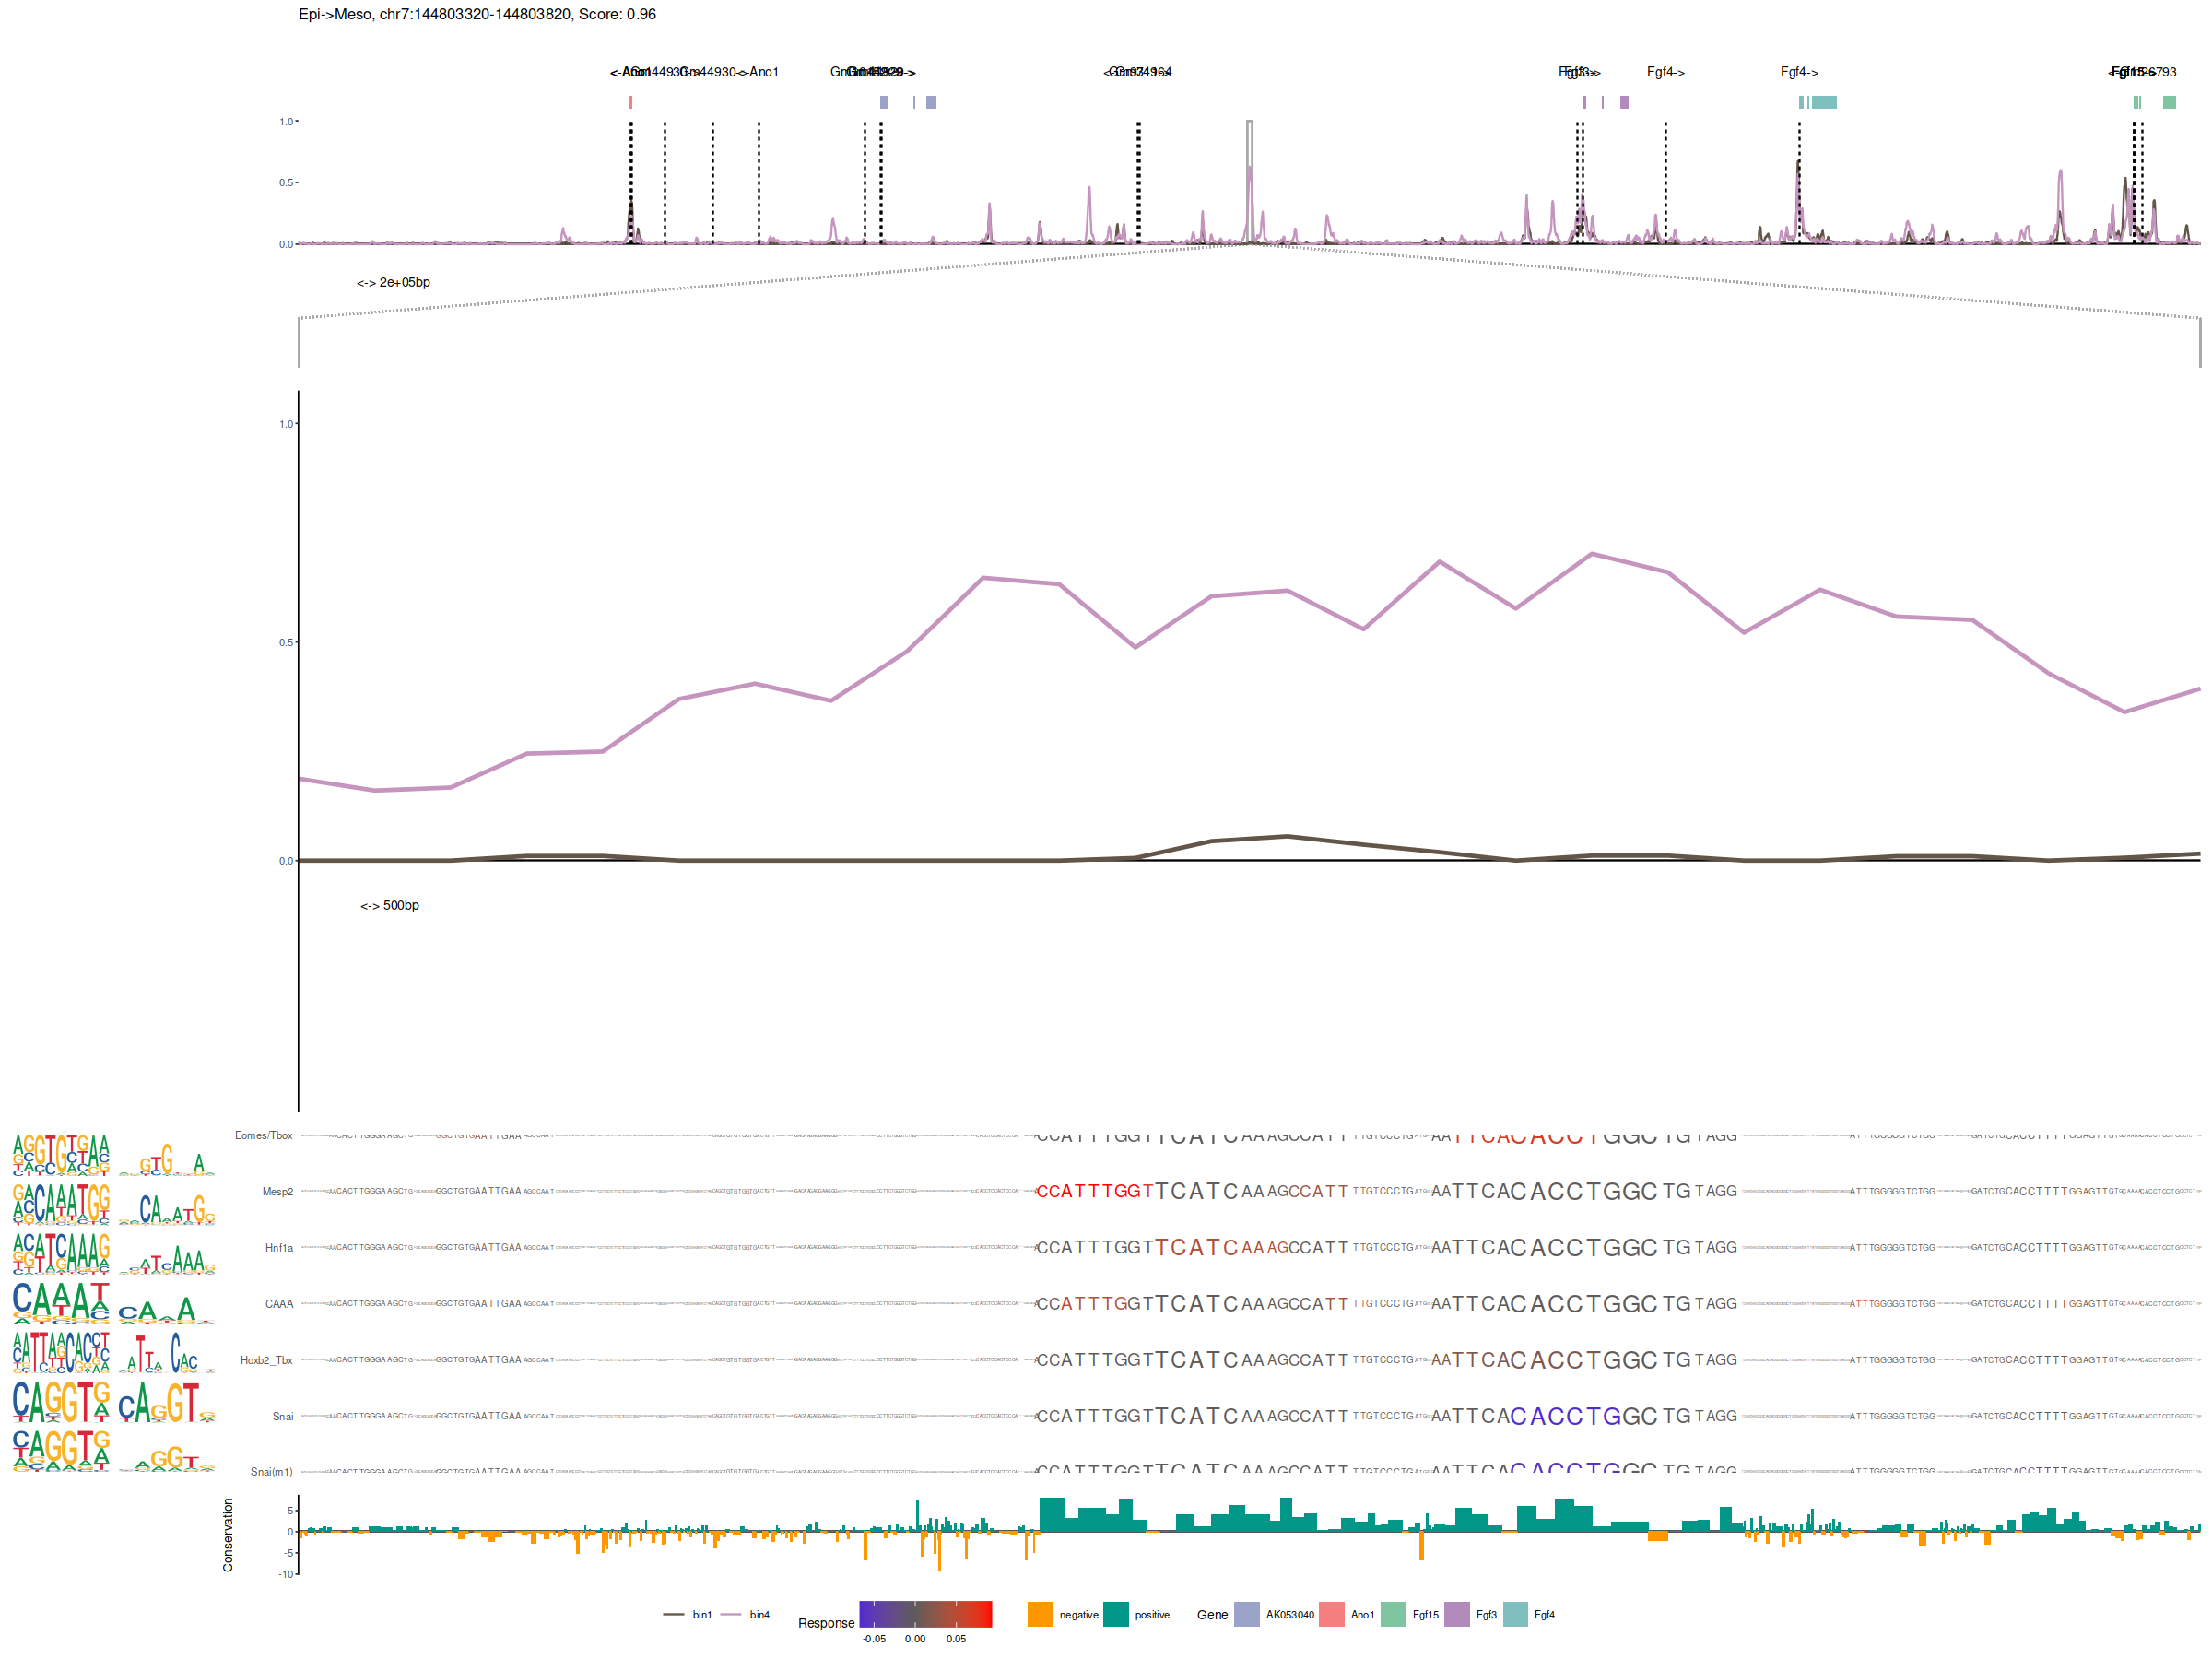

In [5]:
sps(20, 15)
plot_iq_locus(
    interval_meso,
    model_list_lt[["meso"]],
    atac_tracks = c("gastrulation_atac.meso_bin1", "gastrulation_atac.meso_bin4"),
    atac_names = c("bin1", "bin4"),
    atac_colors = traj_colors[["meso"]],
    annot_track_name = "Conservation",
    annot_track = "phyloP242",
    normalize_tn5bias = TRUE,
    norm_q = 0.995,
    score = interval_meso[1, ]$score,
    title = model_traj_map[["meso"]],
    norm_intervals = model_list[["meso"]]@peak_intervals,
)

In [6]:
traj_model <- model_list[["endo"]]
interval_endo <- traj_model@normalized_energies %>%
    as.data.frame() %>%
    bind_cols(traj_model@peak_intervals %>% select(chrom:end)) %>%
    mutate(score = traj_model@diff_score) %>%
    arrange(desc(score)) %>%
    slice(21) %>%
    select(chrom:end, score)

interval_endo

,chrom,start,end,score
,<fct>,<dbl>,<dbl>,<dbl>
50247,chr12,57496440,57496740,0.8549184


→ Computing energies and responses for 21 PBM models

→ Preparing ATAC-seq data (2 tracks)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `cumw = cumw/max(cumw)`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf”
→ Preparing annotation data (1 tracks)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_rect()`).”


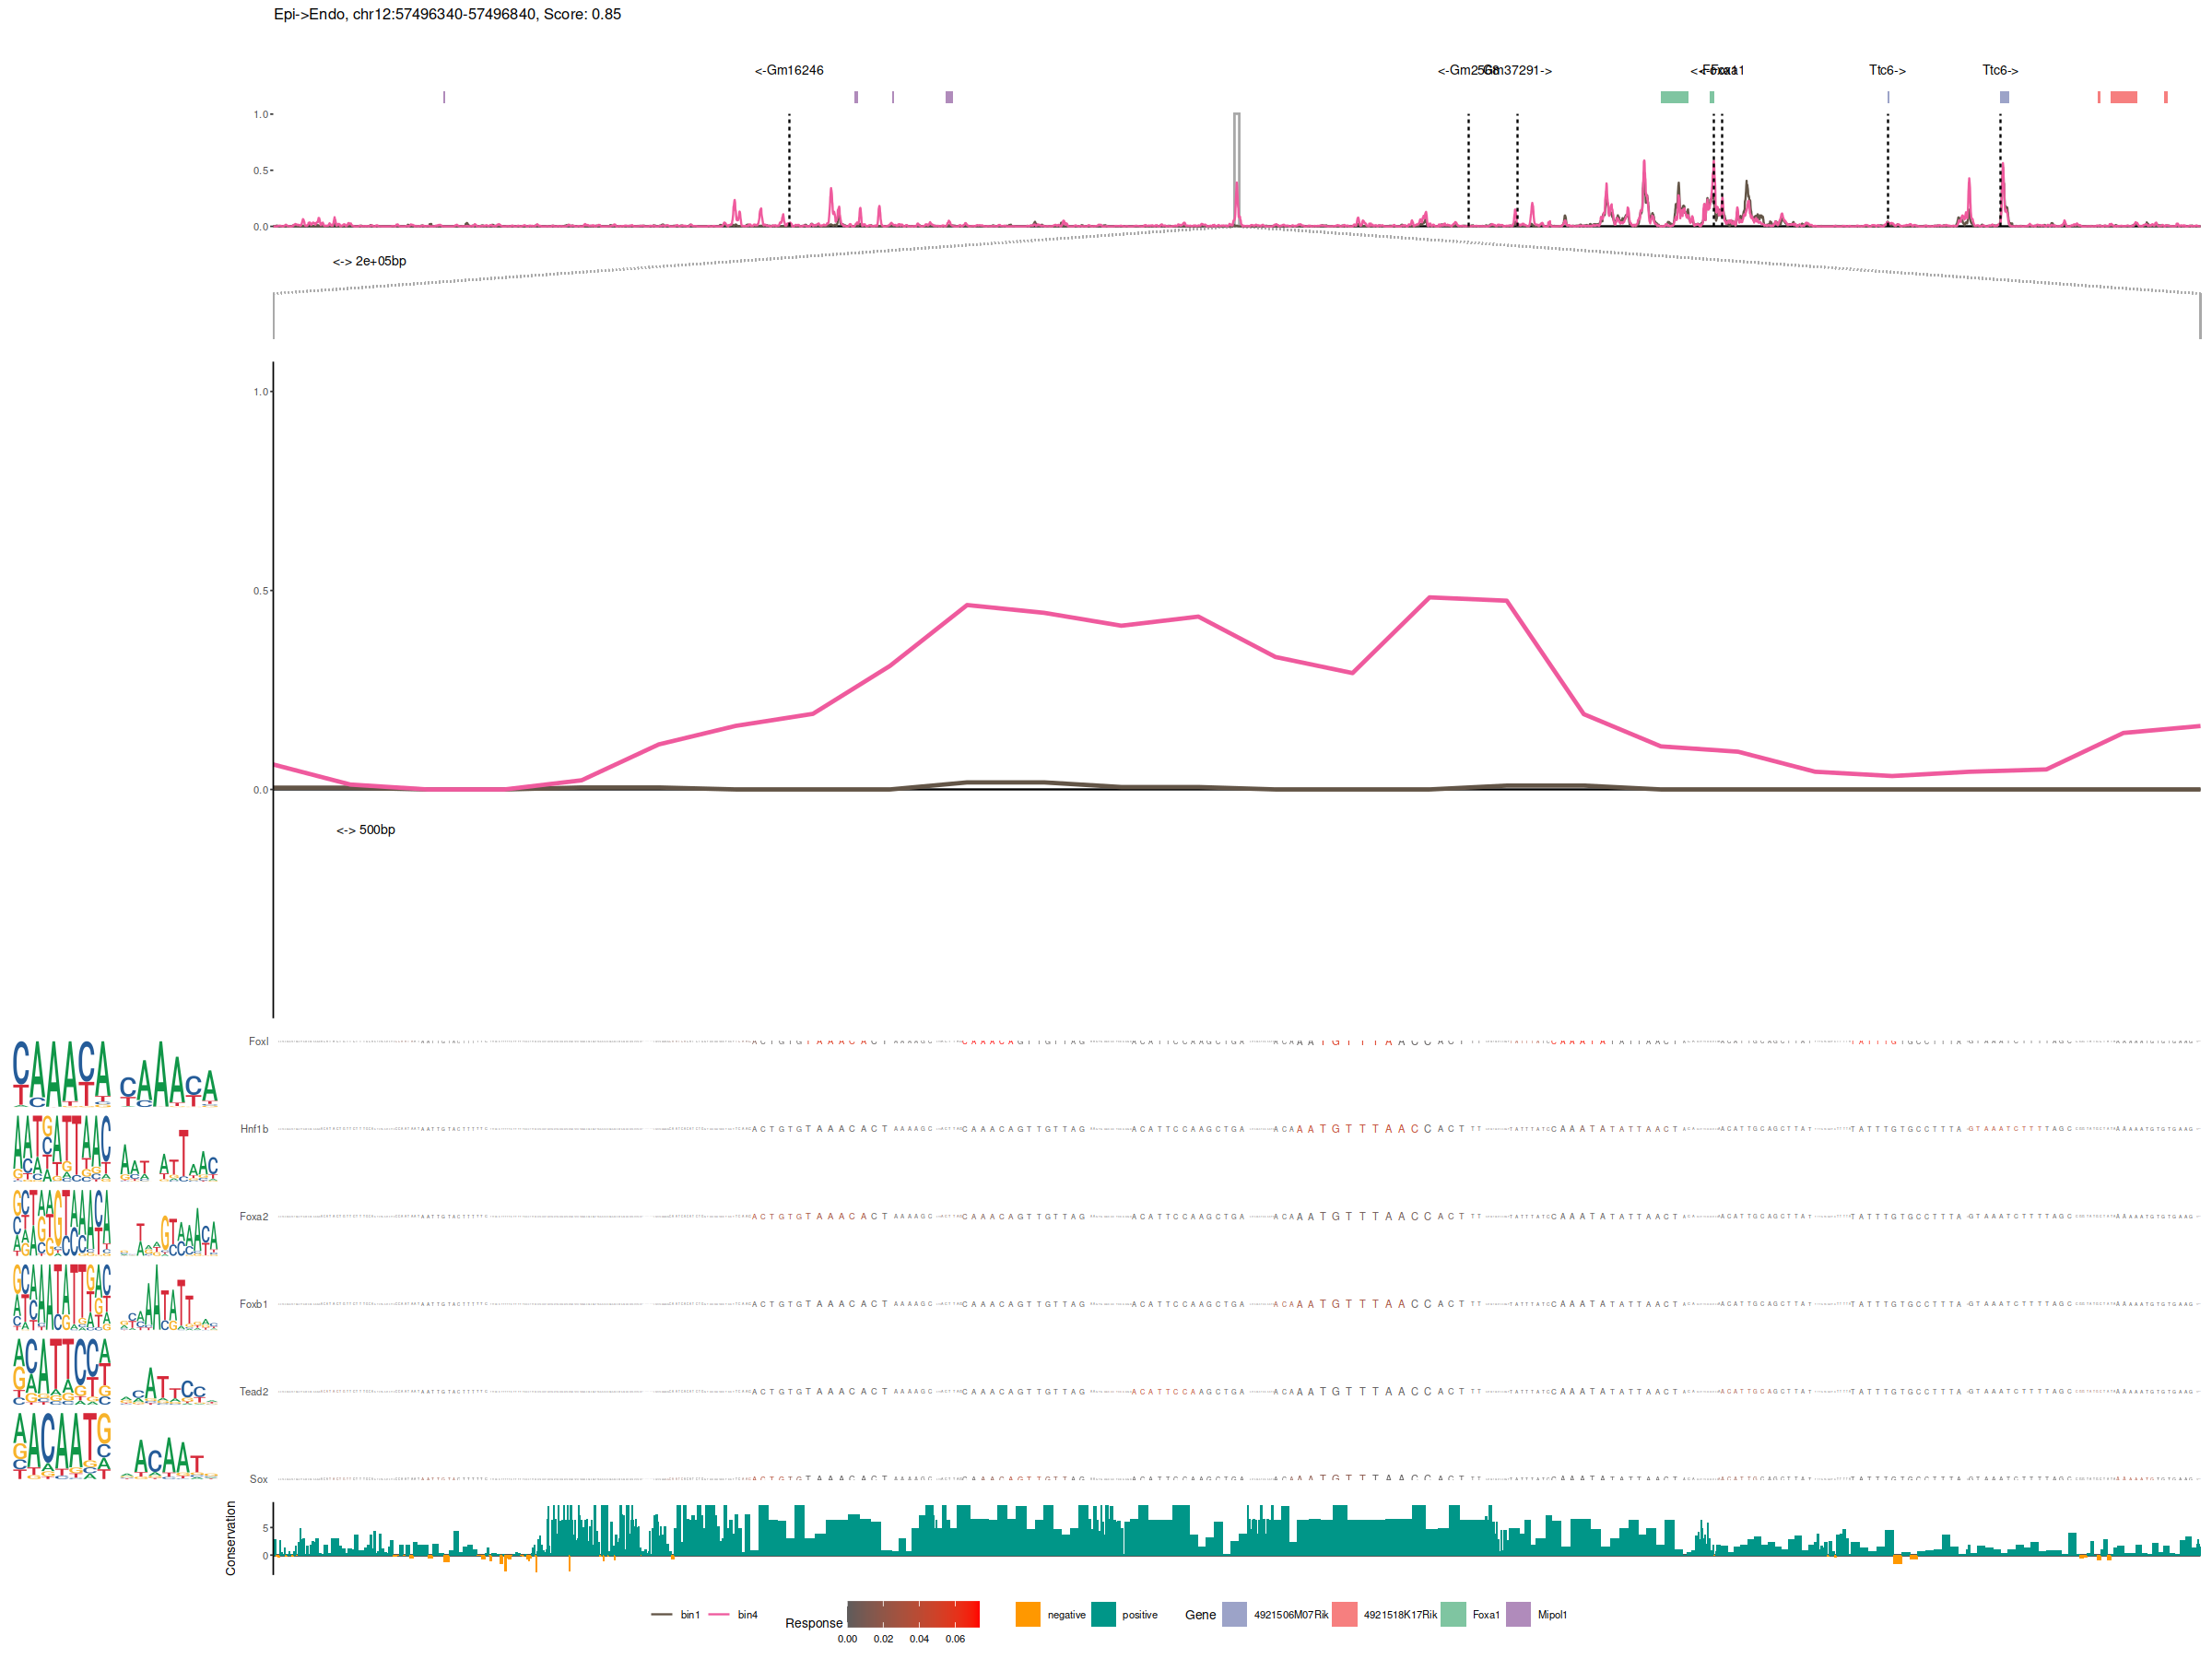

In [7]:
sps(20, 15)
plot_iq_locus(
    interval_endo,
    model_list_lt[["endo"]],
    atac_tracks = c("gastrulation_atac.endo_bin1", "gastrulation_atac.endo_bin4"),
    atac_names = c("bin1", "bin4"),
    atac_colors = traj_colors[["endo"]],
    annot_track_name = "Conservation",
    annot_track = "phyloP242",
    normalize_tn5bias = TRUE,
    norm_q = 0.995,
    score = interval_endo[1, ]$score,
    title = model_traj_map[["endo"]],
    norm_intervals = model_list[["endo"]]@peak_intervals,
    mark_conservation = FALSE,
    scale_cex = 300,
    T_rmax = 0.2,
    motifs = c("Foxl", "Hnf1b", "Foxa2", "Foxb1", "Tead2", "Sox"),
    dna_height = 0.05
)